<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Variogram Calculation

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy* [e-book]. Zenodo. doi:10.5281/zenodo.15169133 [![DOI](https://zenodo.org/badge/838927017.svg)](https://doi.org/10.5281/zenodo.15169132)  
```

The workflows in this book and more are available here:

```{admonition} Cite the GeostatsPyDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *GeostatsPyDemos: GeostatsPy Python Package for Spatial Data Analytics and Geostatistics Demonstration Workflows Repository* (0.0.1) [Software]. Zenodo. doi:10.5281/zenodo.12667036. GitHub Repository: https://github.com/GeostatsGuy/GeostatsPyDemos [![DOI](https://zenodo.org/badge/777871341.svg)](https://doi.org/10.5281/zenodo.12667035)



```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of  **Calculating Variograms** with GeostatsPy. 

**YouTube Lecture**: check out my lectures on:

* [Stationarity](https://youtu.be/QwxQ9xuUHlU?si=7GK0qTeskd1VsqQQ)
* [Spatial Continuity](https://youtu.be/j0I5SGFm00c?si=6rQJQenNvvUGzuvs)        
* [Variogram Introduction](https://youtu.be/jVRLGOsnYuw?si=RD5exyGl_I_LAl4H)
* [Variogram Calculation](https://youtu.be/mzPLicovE7Q?si=-ZPgFK52h2xp1cER)
* [Variogram Parameters](https://youtu.be/NE4xfhIHAm4?si=dF18zj5_M2yVwxoD)
* [Variogram Directions](https://youtu.be/bryRCrtf3hk?si=058uFy-eTtTqwNPr)
* [Variogram Modeling](https://youtu.be/-Bi63Y3u6TU?si=-kwvFLicNTbg85xL)

For your convenience here's a summary of salient points.
    
#### Spatial Continuity 

**Spatial Continuity** is the correlation between values over distance.

* No spatial continuity – no correlation between values over distance, random values at each location in space regardless of separation distance.

* Homogenous phenomenon have perfect spatial continuity, since all values as the same (or very similar) they are correlated. 

We need a statistic to quantify spatial continuity! A convenient method is the Semivariogram.

#### Stationarity

Any statistic requires replicates, repeated sampling (e.g., air or water samples from a monitoring station). In our geo-spatial problems repeated samples are not available at a location in the subsurface.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/core_sample.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Core sample (left), what remains after the sample is taken (right).
</figcaption>
</figure>

The decision of the stationary domain for sampling is an expert choice. Without it we are stuck in the “hole” and cannot calculate any statistics nor say anything about the behavior of the subsurface between the sample data.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/core_samples.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Core samples at locations, \(u_1, u_2, \ldots, u_7\) within the area of interest.
</figcaption>
</figure>

From the above image we can see two important components for stationarity,

1. **Import License** - choice to pool specific samples to evaluate a statistic.

2. **Export License** - choice of where in the subsurface this statistic is applicable.

How do we define stationarity? Here's a geological and an engineering or statistical definition of stationarity,

**Geological Definition** - for example, The rock over the stationary domain is sourced, deposited, preserved, and post-depositionally altered in a similar manner, the domain is map-able and may be used for local prediction or as information for analogous locations within the subsurface; therefore, it is useful to pool information over this expert mapped volume of the subsurface.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/outcrop.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Outcrop with mapped units, \(S3, S4, \ldots, S6\). Each unit is deemed to be stationary by the geological definition (image from Fildani et al., 2009).
</figcaption>
</figure>

**Engineering or Statistical Definition**: The metrics of interest are invariant under translation over the domain.  For example, one point stationarity indicates the that histogram and associated statistics do not rely on location, $\bf{u}$.  Statistical stationarity for some common statistics:

Stationary mean,  

$$
𝐸{𝑍(\bf{u})} = m, \quad \forall \quad \bf{u} 
$$

Stationary Distribution,

$$
𝐹(\bf{𝐮};𝑧)=𝐹(𝑧), \quad \forall \quad \bf{u} 
$$

Stationary Semivariogram,

$$
\gamma_𝑧 (\bf{𝐮};\bf{𝐡})= \gamma_𝑧(\bf{h}), \quad \forall \bf{u} 
$$

May be extended to any statistic of interest including, 

* facies proportions

* bivariate distributions

* multiple point statistics

* correlation

* etc.

Note for engineering or statistical definition of stationarity there are two questions the we must answer,

1. What metric / statistic?
  
2. Over what volume?

Some further comments on stationarity,

* **Stationarity is a decision, not a hypothesis**; therefore, it cannot be tested.  Data may demonstrate that it is inappropriate. 

* **The stationarity assessment depends on scale.** This choice of modeling scale(s) should be based on the specific problem and project needs.

* **instead of time, we must pool samples over space** to calculate our statistics. This decision to pool is the decision of stationarity.  It is the decision that the subset of the subsurface is all the “same stuff”.

#### Stationarity Exercise

Let's test our knowledge by staring at stone wall on the 40 acres, campus of The University of Texas at Austin.

Is this stone wall stationary?

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/wall.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Stone wall from north side of Patton Hall. The stone is Indiana limestone from Bedford, Indiana.
</figcaption>
</figure>

While you stare at this, focus on the entire image, and see how it changes over the image? What if we zoom in here?

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/wall2a.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Stone wall from north side of Patton Hall. The stone is Indiana limestone from Bedford, Indiana.
</figcaption>
</figure>

Now let's look at only the center, is this more or less stationary?

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/wall2b.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Stone wall from north side of Patton Hall. The stone is Indiana limestone from Bedford, Indiana.
</figcaption>
</figure>

Now let's zoom in here,

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/wall3a.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Stone wall from north side of Patton Hall. The stone is Indiana limestone from Bedford, Indiana.
</figcaption>
</figure>

Now only looking at this part, is this more or less stationary?

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/wall3b.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Stone wall from north side of Patton Hall. The stone is Indiana limestone from Bedford, Indiana.
</figcaption>
</figure>

Let's return to the statistical definition of stationarity, what were you looking at?

* brick color

* brick size

* brick aspect ratio

* fossils (bivalves)

Did you notice that the (1) entire image appears stationary, the (2) zoomed in appears less stationary, (3) second zoomed in image appears more stationary again!

* remember, stationarity is not homogeneity, it is ok to have change by there is not a consistent change over the area of investigation.

#### Comments on Stationarity

**We cannot avoid a decision of stationarity**. No stationarity decision and we cannot move beyond the data.  Conversely, assuming broad stationarity over all the data and over large volumes of the earth is naïve.


**Geomodeling stationarity is the decision**: (1) over what region to pool data (import license) and (2) over what region to use the resulting statistics (export license).


**Nonstationary trends** may be mapped, and the remaining stationary residual modelled statistically / stochastically, trends may be treated uncertain.  

**Good geological mapping and data integration is essential!** It is the framework of any subsurface model. 

Now that we understand stationarity we can calculate and model spatial continuity.

#### Spatial Continuity

Let's make a simple example,

Area of interest
2D 1,000 m x 1,000 m
1 Injector and 4 producers 

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/example.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Example 2D water flood model over 1,000 x 1,000 m with 1 injector and 4 producers.
</figcaption>
</figure>

Note, for all models the porosity and permeability distributions are held constant, porosity and permeability are highly correlated and I will only show the permeability models for brevity.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/distributions.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Example 2D water flood model porosity and permeability distributions.
</figcaption>
</figure>

Now consider these two models, remember they have the same univariate distributions,

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/model1.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Example 2D water flood model over 1,000 x 1,000 m with 1 injector and 4 producers.
</figcaption>
</figure>

What's the difference? The spatial arrangement of the permeability, how far can we go and the permeability is still similar, this is spatial continuity. The model on the left has no spatial continuity and the model on the right has short spatial continuity.

Does spatial continuity impact our transfer functions? Let's run the water flood and looks at travel time (earliest arrival) of water.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/marching1.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Example water flood travel earliest arrival times for no spatial continuity (left) and short spatial continuity (right).
</figcaption>
</figure>

The model with no spatial continuity has better, more uniform, piston-like sweep for better recovery. What if we increase the spatial continuity?

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/marching2.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Example water flood travel earliest arrival times for no spatial continuity (left) and long spatial continuity (right).
</figcaption>
</figure>

With greater spatial continuity the sweep is even worse. One more example,

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/marching3.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Example water flood travel earliest arrival times for no spatial continuity (left) and long, anisotropic spatial continuity (right).
</figcaption>
</figure>

This long, anisotropic spatial continuity is resulting in preferred pathways due to high permeability streaks. Clearly spatial continuity matters, so we must calculate it and model it. 

* the semivariogram is one of our tools to calculate and model spatial continuity

#### The Semivariogram

Function of difference over distance.

* The expected (average) squared difference between values separated by a lag distance vector (distance and direction), $h$:

$$
\gamma(\bf{h}) = \frac{1}{2 N(\bf{h})} \sum^{N(\bf{h})}_{\alpha=1} (z(\bf{u}_\alpha) - z(\bf{u}_\alpha + \bf{h}))^2  
$$

where $z(\bf{u}_\alpha)$ and $z(\bf{u}_\alpha + \bf{h})$ are the spatial sample values at tail and head locations of the lag vector respectively.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/variogram.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;"> Tail \(\bf{u}\) and head \(\bf{u} + \bf{h}\) locations separated by lag vector \(\bf{h}\). 
</figcaption>
</figure>

* Calculated over a suite of lag distances to obtain a continuous function.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/variogram2.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Experimental variogram points, variogram value vs. lag \(\bf{h}\). 
</figcaption>
</figure>

* the $\frac{1}{2}$ term converts a variogram into a semivariogram, but in practice the term variogram is used instead of semivariogram.
* We prefer the semivariogram because it relates directly to the covariance function, $C_x(\bf{h})$ and univariate variance, $\sigma^2_x$:

$$
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
$$

Note the correlogram is related to the covariance function as:

$$
\rho_x(\bf{h}) = \frac{C_x(\bf{h})}{\sigma^2_x}
$$

The correlogram provides of function of the $\bf{h}-\bf{h}$ scatter plot correlation vs. lag offset $\bf{h}$.  

$$
-1.0 \le \rho_x(\bf{h}) \le 1.0
$$

To help my students visualize the relationship between variogram and correlation of the $\bf{h}-\bf{h}$ scatter plot I build an interactive Python [variogram h-h scatter plot dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Variogram_h_Scatter.ipynb),

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/interactive_hscatter_temp.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Interactive Python dashboard for variogram and h-h scatter plot correlation. 
</figcaption>
</figure>

#### Variogram Observations

The following are common observations for variograms that should assist with their practical use.

##### Observation \#1 - As distance increases, variability increase (in general).

This is common since in general, over greater distance offsets, there is often more difference between the head and tail samples.

In some cases, such as with spatial cyclicity of the hole effect variogram model the variogram may have negative slope over some lag distance intervals

Negative slopes at lag distances greater than half the data extent are often caused by too few pairs for a reliable variogram calculation

##### Observation \#2 - Calculated with over all possible pairs separated by lag vector, $\bf{𝐡}$.

We scan through the entire data set, searching for all possible pair combinations with all other data.  We then calculate the variogram as one half the expectation of squared difference between all pairs.

More pairs results in a more reliable measure.

##### Observation \#3 - Need to plot the sill to know the degree of correlation.

**Sill** is the variance, $\sigma^2_x$

Given stationarity of the variance, $\sigma^2_x$, and variogram $\gamma(\bf{h})$:

we can define the covariance function:

$$
C_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
$$

The covariance measure is a measure of similarity over distance (the mirror image of the variogram as shown by the equation above).

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/variogram_cov.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;"> The relationship between variogram, sill and covariance function. 
</figcaption>
</figure>

Given a standardized distribution $\sigma^2_x = 1.0$, the covariance, $C_x(\bf{h})$, is equal to the correlogram, $\rho_x(\bf{h})$: 

$$
\rho_x(\bf{h}) = \sigma^2_x - \gamma(\bf{h})
$$

##### Observation \#4 - The lag distance at which the variogram reaches the sill is know as the range.

At the range, knowing the data value at the tail location provides no information about a value at the head location of the lag distance vector.

##### Observation \#5 - The nugget effect, a discontinuity at the origin

Sometimes there is a discontinuity in the variogram at distances less than the minimum data spacing.  This is known as **nugget effect**.

The ratio of nugget / sill, is known as relative nugget effect (%). Modeled as a discontinuity with no correlation structure that at lags, $h \gt \epsilon$, an infinitesimal lag distance, and perfect correlation at $\bf{h} = 0$.
Caution when including nugget effect in the variogram model as measurement error, mixing populations cause apparent nugget effect

This exercise demonstrates the semivariogram calculation with GeostatsPy. The steps include:

1. generate a 2D model with sequential Gaussian simulation
2. sample from the simulation
3. calculate and visualize experimental semivariograms

To help my students visualize the nugget I build an interactive Python [variogram nugget effect dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Variogram_Nugget_Effect.ipynb),

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/interactive_nugget_temp.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Interactive Python dashboard for variogram nugget effect. 
</figcaption>
</figure>

#### Variogram Calculation Parameters

For commonly encountered irregularly space spatial data samples, if we specific a specific lag vector, $\bf{h}$,

$$
\bf{h} = 100.00000 \text{ m at } 90.0000 \text{ degrees azimuth}
$$

we are unlikely to find data pairs sperated by exactly that lag distance and direction. We need to use a search template to identify the pairs for a specific lag distance and direction.

1. First step is to select the direction as an **azimuth**, here 045 azimuth, 45 degrees from north towards east.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/template.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Variogram calculation search template, azimuth parameter. 
</figcaption>
</figure>

2. Set unit lag distance to at least the ‘common’ minimum data spacing $\rightarrow$ no data pairs available at shorter lag distances.

* lag distance controls the number/frequency of experimental variogram points

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/template2.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Variogram calculation search template, unit lag distance.
</figcaption>
</figure>

3. Set the lag tolerance, default to $\frac{1}{2}$ the unit lag distance.

* lower lag tolerance will omit possible pairs

* larger lag tolerance will overlap the lag bins, smooth the results.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/template3.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Variogram calculation search template, lag tolerance.
</figcaption>
</figure>

4. Set the azimuth tolerance to 90.0 for isotropic variograms. Set azimuth tolerance, default 22.5 degrees for directional variograms.

* lower azimuth tolerance is more direction specific and noisier

* larger azimuth tolerance is more isotropic and smoother

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/template4.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Variogram calculation search template, lag tolerance.
</figcaption>
</figure>

5. Set a bandwidth limit is needed to limit the distance of investigation away from the lag vector.

* set bandwidth very large if isotropic to remove its influence and avoid artifacts

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/template5.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Variogram calculation search template, lag tolerance.
</figcaption>
</figure>
 
#### Isotropic and Anisotropic Experimental Variograms 

**Isotropic or Omnidirectional** – azimuth tolerance $= 90^{o}$,

* all pairs lag distance ± lag distance tolerance. 
 
**Anisotropic or Directional** – azimuth Tolerance $\lt 90^{o}$. 

* only considering pairs in a specified direction, larger azimuth tolerance will approach isotropic.

* calculate directional, experimental variograms in the major and minor directions to support interpretation and variogram modeling

* do not extend the azimuth tolerance $\gt 90^{o}$, results in a bias as some of the data pairs are counted twice in a lag due to arbitrary orientation.

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/directional.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;"> Azimuth tolerance and identified data pairs.
</figcaption>
</figure>

With this information you are ready to calculate experimental variograms.

#### Calculating Experimental Variograms

While the workflow below demonstrates the workflow for calculating experimental variogram, to assist my students with the variogram calculation process, I build an interactive Python [variogram calculation dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Variogram_Calculation.ipynb),

<figure style="text-align: center;">
  <img src="_static/variogram_calculate/interactive_variogram_calculate_temp.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;"> Interactive Python dashboard for calculating experimental variograms. 
</figcaption>
</figure>

#### Load the Required Libraries

The following code loads the required libraries. 

In [1]:
import geostatspy.GSLIB as GSLIB                              # GSLIB utilities, visualization and wrapper
import geostatspy.geostats as geostats                        # GSLIB methods convert to Python      
import geostatspy
print('GeostatsPy version: ' + str(geostatspy.__version__)) 

GeostatsPy version: 0.0.72


We will also need some standard packages. These should have been installed with Anaconda 3.

In [2]:
import os                                                     # set working directory, run executables

from tqdm import tqdm                                         # suppress the status bar
from functools import partialmethod
tqdm.__init__ = partialmethod(tqdm.__init__, disable=True)

ignore_warnings = True                                        # ignore warnings?
import numpy as np                                            # ndarrays for gridded data
import pandas as pd                                           # DataFrames for tabular data
import matplotlib.pyplot as plt                               # for plotting
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator) # control of axes ticks
from scipy import stats                                       # summary statistics
import math                                                   # trig etc.
import scipy.signal as signal                                 # kernel for moving window calculation
import random
plt.rc('axes', axisbelow=True)                                # plot all grids below the plot elements
if ignore_warnings == True:                                   
    import warnings
    warnings.filterwarnings('ignore')
cmap = plt.cm.inferno                                         # color map

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

This is a convenience function to add major and minor gridlines to our plots.

In [3]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

#### Set the Working Directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [4]:
#os.chdir("c:/PGE383")                                        # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object. 

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/sample_data_biased.csv") # load data
df = df[['X','Y','Facies','Porosity']]                        # retain only the required features
df.head(n=3)                                                  # DataFrame preview to check  

X    Y  Facies  Porosity
0  100  900       1  0.115359
1  100  800       1  0.136425
2  100  600       1  0.135810

We will work by-facies, that is separating sand and shale facies and working with them separately.

* This command extracts the sand and shale 'Facies" into new DataFrames for our analysis.

* Note, we use deep copies to ensure that edits to the new DataFrames won't change the original DataFrame.

* We use the drop parameter to avoid making an new index column.

In [6]:
df_sand = pd.DataFrame.copy(df[df['Facies'] == 1]).reset_index(drop = True) # copy only 'Facies' = sand records
df_shale = pd.DataFrame.copy(df[df['Facies'] == 0]).reset_index(drop = True) # copy only 'Facies' = shale records
df_sand.head()                                                # preview the sand only DataFrame 

X    Y  Facies  Porosity
0  100  900       1  0.115359
1  100  800       1  0.136425
2  100  600       1  0.135810
3  200  800       1  0.154648
4  200  700       1  0.153113

#### Summary Statistics for Tabular Data

Let's look at and compare the summary statistics for sand and shale.

In [7]:
df_sand[['Porosity']].describe().transpose()                  # summary table of sand only DataFrame statistics

count      mean       std      min       25%       50%      75%  \
Porosity  235.0  0.144298  0.035003  0.08911  0.118681  0.134647  0.16212   

              max  
Porosity  0.22879

In [8]:
df_shale[['Porosity']].describe().transpose()                 # summary table of shale only DataFrame statistics

count      mean       std       min       25%       50%       75%  \
Porosity   54.0  0.093164  0.012882  0.058548  0.084734  0.094569  0.101563   

              max  
Porosity  0.12277

The facies have significant differences in their summary statistics. 

* Looks like separation by facies is a good idea for modeling.

#### Set Limits for Plotting, Colorbars and Map Specification

Limits are applied for data and model visualization.

In [9]:
xmin = 0.0; xmax = 1000.0                                     # spatial limits
ymin = 0.0; ymax = 1000.0

pormin = 0.05; pormax = 0.23                                  # feature limits
npormin = -3.0; npormax = 3.0                                 # feature limits

vario_min = 0.0; vario_max = 1.6                              # variogram limits

tmin = -9999.9; tmax = 9999.9                                 # triming limits

#### Gaussian Transformation

Let's transform the data grouped overall both facies (sand and shale) and separated by facies to normal score values (Gaussian distributed with a mean of 0.0 and variance of 1.0). 

* This is required for sequential Gaussian simulation (common target for our variogram models) 

* Gaussian transform assists with outliers and provides more interpretable variograms. 

The following command will transform the Porosity and to standard normal.

* Gaussian distributed with a mean of 0.0 and standard deviation and variance of 1.0.

In [10]:
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity')   # all 
df_sand['NPor'], tvPorSand, tnsPorSand = geostats.nscore(df_sand, 'Porosity') # sand 
df_shale['NPor'], tvPorShale, tnsPorShale = geostats.nscore(df_shale, 'Porosity') # shale

Once again we check the DataFrame, see the new Gaussian transformed porosity.

In [11]:
df_sand.head()                                                # preview sand DataFrame with nscore transforms

X    Y  Facies  Porosity      NPor
0  100  900       1  0.115359 -0.804208
1  100  800       1  0.136425  0.074735
2  100  600       1  0.135810  0.042679
3  200  800       1  0.154648  0.512201
4  200  700       1  0.153113  0.476045

That looks good! 

* One way to check is to see if the relative magnitudes of the normal score transformed values match the original values, e.g., that the normal score transform of 0.10 porosity normal score is less than the normal score transform of 0.14 porosity.  
* Also, the normal score transform of values close to the original distribution's mean should be close to 0.0. 

Let's also check the original and transformed sand and shale porosity distributions.

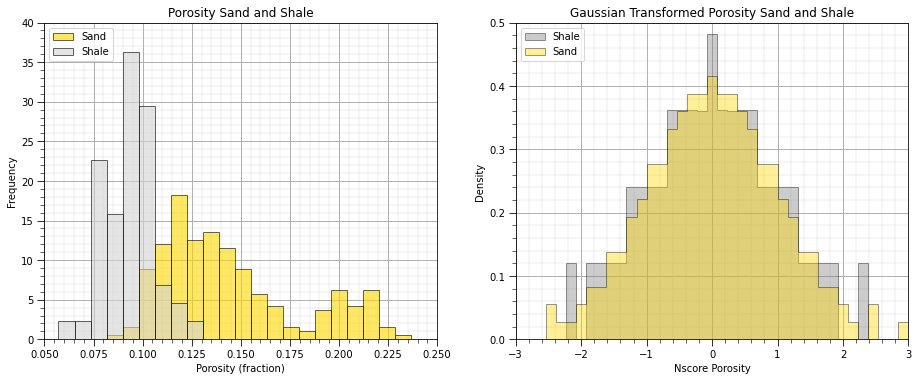

In [12]:
plt.subplot(121)                                              # plot original sand and shale porosity histograms
plt.hist(df_sand['Porosity'], facecolor='gold',bins=np.linspace(0.0,0.4,50),alpha=0.6,density=True,edgecolor='black',
         label='Sand')
plt.hist(df_shale['Porosity'], facecolor='lightgrey',bins=np.linspace(0.0,0.4,50),alpha=0.6,density=True,edgecolor='black',
         label = 'Shale')
plt.xlim([0.05,0.25]); plt.ylim([0,40.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity Sand and Shale')
plt.legend(loc='upper left'); add_grid()

plt.subplot(122)                                              # plot nscore transformed sand and shale histograms
plt.hist(df_shale['NPor'], facecolor='grey',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled",alpha=0.4,density=True,
         cumulative=False,edgecolor='black',label='Shale')
plt.hist(df_sand['NPor'], facecolor='gold',bins=np.linspace(-3.0,3.0,40),histtype="stepfilled",alpha=0.4,density=True,
         cumulative=False,edgecolor='black',label='Sand')
plt.xlim([-3.0,3.0]); plt.ylim([0,0.50])
plt.xlabel('Nscore Porosity'); plt.ylabel('Density'); plt.title('Gaussian Transformed Porosity Sand and Shale')
plt.legend(loc='upper left'); add_grid()

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

#### Location Maps

The normal score transform has correctly transformed the porosity over sand and shale facies to standard normal.  Let's plot the location maps of normal score transforms of porosity and permeability for all facies, sand facies and shale facies.

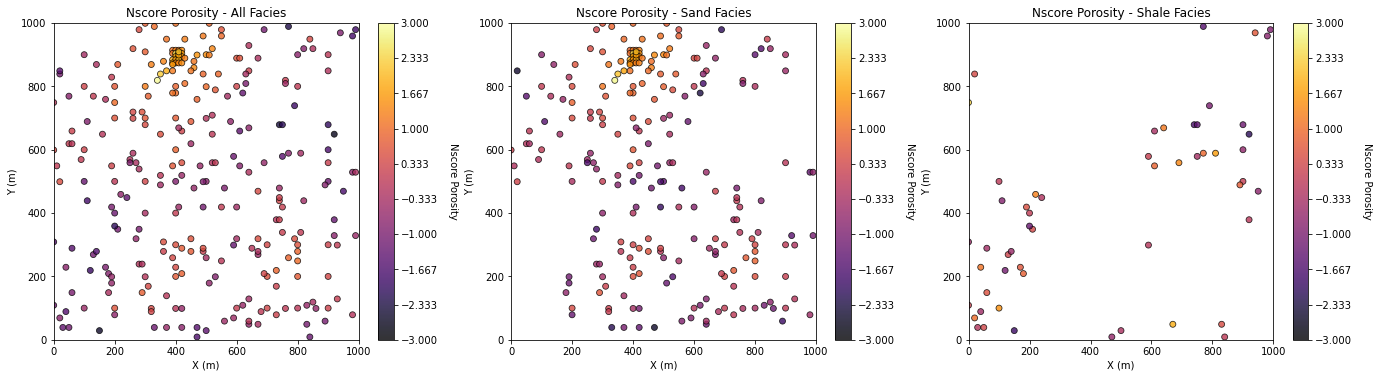

In [13]:
plt.subplot(131)                                              # location map all facies
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)

plt.subplot(132)                                              # location map sand only
GSLIB.locmap_st(df_sand,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - Sand Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap)

plt.subplot(133)                                              # location map shale only
GSLIB.locmap_st(df_shale,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - Shale Facies','X (m)','Y (m)',
                'Nscore Porosity',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.1, wspace=0.2, hspace=0.3); plt.show()

#### Experimental Variogram Calculation

Let's see the parameters for the gamv, irregular data, GeostatsPy's experimental variogram calculation function.

In [14]:
geostats.gamv                                                 # see the input parameters required by the gamv function

<function geostatspy.geostats.gamv(df, xcol, ycol, vcol, tmin, tmax, xlag, xltol, nlag, azm, atol, bandwh, isill)>

We can use the location maps to help determine good variogram calculation parameters.

We are ready to calculate variogram! Let's calculate isotropic variograms for the transformed normal score porosity and permeability for sand, shale and mixed (without separating sand and shale).  Some information on the parameters that I chose:

```p
tmin = -9999.; tmax = 9999.; 
lag_dist = 100.0; lag_tol = 50.0; nlag = 7; bandh = 9999.9; azi = 0; atol = 90.0; isill = 1
```
* tmin, tmax are trimming limits - set to have no impact, no need to filter the data
* lag_dist, lag_tol are the lag distance, lag tolerance - set based on the common data spacing (100m) and tolerance as 100% of lag distance for additional smoothing
* nlag is number of lags - set to extend just past 50 of the data extent
* bandh is the horizontal band width - set to have no effect
* azi is the azimuth -  it has not effect since we set atol, the azimuth tolerance, to 90.0
* isill is a boolean to standardize the distribution to a variance of 1 - it has no effect since the nscore transform sets the variance to 1.0

Let's try running these variograms and visualizing them.

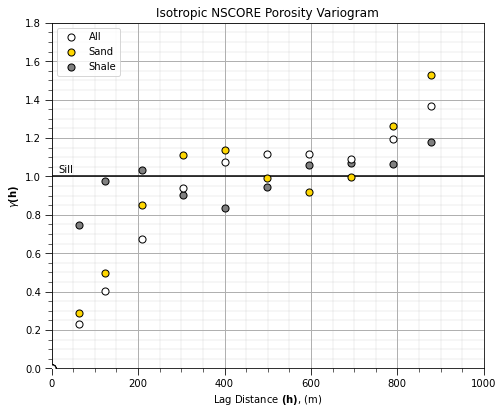

In [20]:
lag_dist = 100.0; lag_tol = 100.0; nlag = 10; bandh = 9999.9; azi = 0.0; atol = 90.0; isill = 1

lag, por_sand_gamma, por_sand_npair = geostats.gamv(df_sand,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,
            bandh,isill)
lag, por_shale_gamma, por_shale_npair = geostats.gamv(df_shale,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,
            bandh,isill)
lag, por_gamma, por_npair = geostats.gamv(df,"X","Y","NPor",tmin,tmax,lag_dist,lag_tol,nlag,azi,atol,bandh,isill)

plt.subplot(111)
plt.scatter(lag,por_gamma,color = 'white',edgecolor='black',s=50,marker='o',label = 'All',zorder=10)
plt.scatter(lag,por_sand_gamma,color = 'gold',edgecolor='black',s=50,marker='o',label = 'Sand',zorder=9)
plt.scatter(lag,por_shale_gamma,color = 'grey',edgecolor='black',s=50,marker='o',label = 'Shale',zorder=8)
plt.plot([0,2000],[1.0,1.0],color = 'black',zorder=1); plt.annotate('Sill',(15,1.02))
plt.xlabel(r'Lag Distance $\bf(h)$, (m)'); plt.ylabel(r'$\gamma \bf(h)$')
plt.title('Isotropic NSCORE Porosity Variogram')
plt.xlim([0,1000]); plt.ylim([0,1.8]); plt.legend(loc='upper left'); add_grid()


plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.3)
plt.show()

The experimental variograms have some interesting features:

* the range of the sand porosity is greater than the shale porosity range
* although the shale short range experimental points may be noisy due to sparse shale data

#### Comments

This was a basic demonstration of variogram calculation with GeostatsPy. Much more can be done, I have other demonstrations for modeling workflows with GeostatsPy in the GitHub repository [GeostatsPy_Demos](https://github.com/GeostatsGuy/GeostatsPy_Demos/tree/main).

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)